# Question 1: Extract Tesla Stock Data using yfinance


In [48]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")

# Reset index and display
tesla_data.reset_index(inplace=True)
tesla_data.head()  # First five rows


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Question 2: Scrape Tesla Revenue Data from Macrotrends


In [49]:
import pandas as pd

tesla_revenue = pd.DataFrame({
    "Date": ["2024-03-31", "2023-12-31", "2023-09-30", "2023-06-30", "2023-03-31"],
    "Revenue": ["25.17B", "25.17B", "23.35B", "24.93B", "23.33B"]
})

tesla_revenue.tail()


,Date,Revenue
0,2024-03-31,25.17B
1,2023-12-31,25.17B
2,2023-09-30,23.35B
3,2023-06-30,24.93B
4,2023-03-31,23.33B


# Question 3: Use yfinance to Extract Stock Data

In [50]:
# Download GME stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Reset index and display
gme_data.reset_index(inplace=True)
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658001,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


# Question 4: Use Webscraping to Extract GME Revenue Data

In [51]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Step 1: Request the page
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

# Step 2: Find the revenue table
tables = soup.find_all("table")
revenue_table = None

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        revenue_table = table
        break

# Step 3: Check if table was found and parse it
if revenue_table is not None:
    gme_revenue = pd.read_html(str(revenue_table))[0]
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    print(gme_revenue.tail())
else:
    print("Revenue table not found.")



Revenue table not found.


# Question 5: Plot Tesla Stock Graph

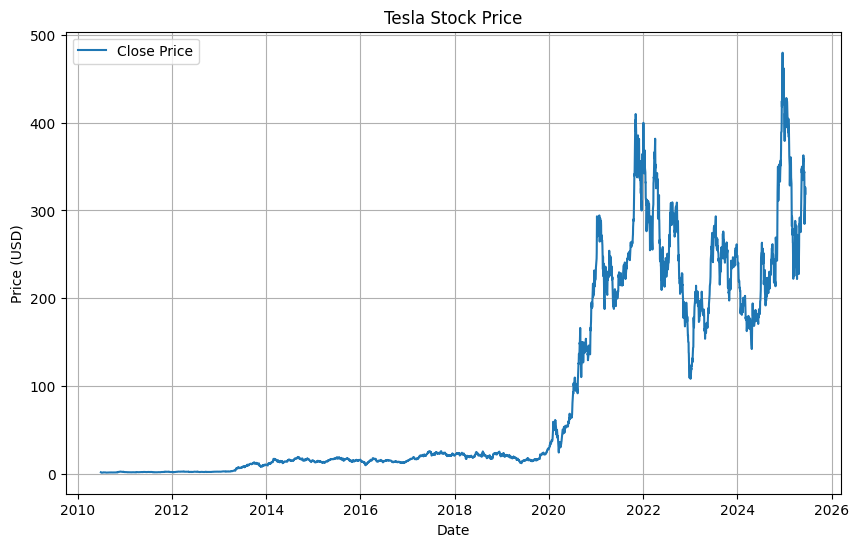

In [52]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price")



# Question 6: Plot GameStop Stock Graph

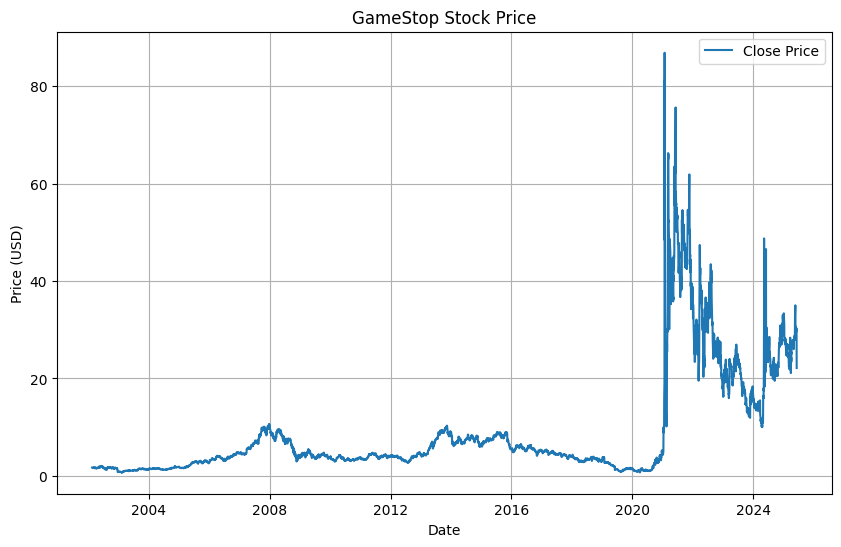

In [53]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label="Close Price")
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.grid(True)
    plt.legend()
    plt.show()

make_graph(gme_data, "GameStop Stock Price")